# STA 141B Assignment 4

Due __Feb 22, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice scraping data from web pages.

## The San Francisco Chronicle

In this assignment, you'll scrape text from [The San Francisco Chronicle](https://www.sfchronicle.com/) newspaper and then analyze the text.

The Chronicle is organized by category into article lists. For example, there's a [Local](https://www.sfchronicle.com/local/) list, [Sports](https://www.sfchronicle.com/sports/) list, and [Food](https://www.sfchronicle.com/food/) list.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Chronicle for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in a Chronicle article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Return a list of article URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* You can use any of the XML/HTML parsing packages mentioned in class. Choose one and use it throughout the entire assignment.

In [1]:
import requests
import json
import numpy as np
import pandas as pd
import lxml.html as lx

def get_artical(page):
    response = requests.get(page)
    response.raise_for_status()
    html = lx.fromstring(response.text)
    urls=pd.DataFrame(html.xpath("//*[@id='content']//a/@href"))##get the urls and save as dataframe
    is_art =urls[0].str.contains("article")##select the links that lead to articals
    return page+urls[is_art]##return the page url+ sub url


In [2]:
art=get_artical("https://www.sfchronicle.com/")
art3=get_artical("https://www.sfchronicle.com/business/")
art2=get_artical("https://www.sfchronicle.com/sports/")

In [108]:
art##example

,0
0,https://www.sfchronicle.com//bayarea/article/C...
1,https://www.sfchronicle.com//bayarea/article/C...
2,https://www.sfchronicle.com//bayarea/article/C...
4,https://www.sfchronicle.com//bayarea/article/H...
5,https://www.sfchronicle.com//nation/article/Pr...
6,https://www.sfchronicle.com//education/article...
7,https://www.sfchronicle.com//bayarea/article/P...
8,https://www.sfchronicle.com//bayarea/article/R...
9,https://www.sfchronicle.com//outdoors/stienstr...
10,https://www.sfchronicle.com//crime/article/Arm...


In [113]:
art2##example

,0
0,https://www.sfchronicle.com/sports//giants/art...
1,https://www.sfchronicle.com/sports//giants/art...
2,https://www.sfchronicle.com/sports//giants/art...
4,https://www.sfchronicle.com/sports//giants/ost...
5,https://www.sfchronicle.com/sports//sports/art...
6,https://www.sfchronicle.com/sports//sports/art...
7,https://www.sfchronicle.com/sports//sharks/art...
8,https://www.sfchronicle.com/sports//sharks/art...
9,https://www.sfchronicle.com/sports//athletics/...
10,https://www.sfchronicle.com/sports//athletics/...


In [116]:
art3##example

,0
0,https://www.sfchronicle.com/business//business...
1,https://www.sfchronicle.com/business//business...
2,https://www.sfchronicle.com/business//business...
4,https://www.sfchronicle.com/business//business...
5,https://www.sfchronicle.com/business//business...
6,https://www.sfchronicle.com/business//business...
7,https://www.sfchronicle.com/business//business...
8,https://www.sfchronicle.com/business//business...
9,https://www.sfchronicle.com/business//business...
10,https://www.sfchronicle.com/business//business...


In [117]:
art3.iloc[1,0]##example

'https://www.sfchronicle.com/business//business/article/Lip-syncing-rules-the-world-but-Smule-hopes-its-13621486.php'

In [111]:
art2.iloc[1,0]##example

'https://www.sfchronicle.com/sports//giants/article/Giants-manager-Bruce-Bochy-will-retire-after-the-13625526.php'

In [112]:
art.iloc[1,0]##example

'https://www.sfchronicle.com//bayarea/article/Candidates-jump-into-SF-district-attorney-race-13626096.php'

__Exercise 1.2.__ Write a function that extracts data from a Chronicle article. The function should:

* Have a parameter `url` for the URL of the article.

* Return a dictionary with keys for:
    + `url`: The URL of the article.
    + `title`: The title of the article.
    + `text`: The complete text of the article.
    + `author`: The author's name (if available) or a suitable missing value.
    + `date`: The date and time the article was published.
    + `date_updated`: The date and time the article was last updated (if available) or a suitable missing value.

For example, for [this article](https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php) your function should return a dictionary with the form:
```js
{'url': 'https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php',
 'title': '‘Gardenlust’ looks at best 21st century gardens in the world',
 'text': 'The book...',
 'author': 'Pam Peirce',
 'date': '2019-02-01T18:02:33+00:00',
 'date_updated': '2019-02-01T18:12:53+00:00'}
```
The value of the `text` field is omitted here to save space. Your function should return the full text in the `text` field.

Hints:

* Many parsing packages allow you to delete elements from an HTML document. Deleting elements is one way to avoid extracting unwanted tags.
* You can union multiple XPath paths with `|`.

In [2]:
def dic_art(page):##input page url and output a dicitonary
    dic={}
    response = requests.get(page)
    html =lx.fromstring(response.text)
    dic["url"]=page #save the url in the dictionary
    dic["title"]=html.xpath("//body//article//header/h1|//*[contains(@class,'article-title')]")[0].text_content().replace('\n', ' ').replace('  ', '')##save the title in "title" and replace \n and space
    dic["text"]=html.xpath("//body//article//main/*|//body//article//p")[1].text_content().replace('\n', ' ').replace('\t', ' ').replace('  ', '')##save the text in "text and replace \n and space
    dic["author"]=html.xpath("//body//article//header//*[contains(@class,'header-byline')]|//*[contains(@itemprop,'name')]|//*[contains(@class,'header-authors-name')]|//body//article//p")[0].text_content().replace('\n', ' ').replace('\t', ' ').replace('  ', '')##save the text in "title" and replace \n and space
    dic["data"]=html.xpath("//body//article//header//*[contains(@itemprop,'datePublished')]|//body//article//p")[0].text.replace('\n', ' ').replace('  ', '')
    dic["data_update"]=html.xpath("//body//article//header//*[contains(@itemprop,'dateModified')]|//body//article//time|//body//article//p")[0].text.replace('\n', ' ').replace('  ', '')
    return dic

In [53]:
##sample
b=dic_art("https://www.sfchronicle.com/business//business/article/PG-E-will-not-award-workers-130-million-in-13638337.php")
b

{'url': 'https://www.sfchronicle.com/business//business/article/PG-E-will-not-award-workers-130-million-in-13638337.php',
 'title': 'PG&E won’t award $130 million in bonuses to workers',
 'text': 'Pacific Gas and Electric Co. will not award any of its planned $130 million in 2018 performance bonuses to thousands of employees after deciding the payments were inappropriate in light of the company’s bankruptcy and the wildfires that have killed dozens of people and destroyed tens of thousands of homes.John Simon, interim CEO of the utility’s parent company PG&E Corp., announced the decision Friday in an internal message to employees that was reviewed by The Chronicle. The payments were set to be awarded next month and about 14,000 employees were eligible, PG&E previously told the bankruptcy court.PG&E had stressed publicly that it was not seeking to award the bonuses to any of its top executives this year, and union leaders described them as part of the normal pay for the thousands of emp

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get data frames of articles for the "Biz+Tech" category as well as two other categories of your choosing (except for "Vault: Archive", "Podcasts", and "In Depth").

Add a column to each that indicates the category, then combine them into one big data frame. Clean up the data, stripping excess whitespace and converting columns to appropriate dtypes.

The `text` column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [3]:
def get_table(url,category):##input the url of category page and category name, output a table of all articles
    urls=get_artical(url)
    l=(list(set(urls.iloc[:,0]))) ##the length of how many pages in the category as count
    author=[]
    url=[]
    date=[]
    dateup=[]
    title=[]
    text=[]
    for x in l:
        a=dic_art(x) ##save each page in a and use a
        author.append(a["author"])
        url.append(x)
        date.append(a["data"])
        text.append(a["text"])
        title.append(a["title"])
        dateup.append(a["data_update"])
    df = pd.DataFrame(             ###form a output table
        {'title': title,
         'author': author,
         'date': date,
         'update':dateup,
         'page':url,
         'text':text,
         'category':category
    })
    return df

In [4]:
biz=get_table("https://www.sfchronicle.com/business/","business")
biz

,title,author,date,update,page,text,category
0,Asian stocks change little ahead of more US-Ch...,"By JOE McDONALD, AP Business Writer","Feb. 20, 2019","Feb. 20, 2019",https://www.sfchronicle.com/business//news/us/...,BEIJING (AP) — Asian stock markets were little...,business
1,"Long, winding road to SF’s get-tough registrat...",Carolyn Said,"Feb. 16, 2018","Feb. 16, 2018",https://www.sfchronicle.com/business//business...,"If anyone knew the ropes about Airbnb rentals,...",business
2,PG&E won’t award $130 million in bonuses to wo...,J.D. Morrisand Matthias Gafni,"Feb. 22, 2019","Feb. 22, 2019",https://www.sfchronicle.com/business//business...,Pacific Gas and Electric Co. will not award an...,business
3,SpaceX will send Israel lander to the moon,By Chabeli Herrera,"Feb. 20, 2019","Feb. 20, 2019",https://www.sfchronicle.com/business//business...,Israel is heading to the moon.,business
4,Bay Area legislator takes aim at bankrupt PG&E...,J.D. Morris,"Feb. 22, 2019","Feb. 22, 2019",https://www.sfchronicle.com/business//business...,A Bay Area lawmaker who has been a longtime cr...,business
5,"SF short-term rentals transformed as Airbnb, o...",By Carolyn Said,By,By,https://www.sfchronicle.com/business//business...,By Carolyn Said,business
6,Four great LED floodlight options,Cnet,"Feb. 23, 2019","Feb. 23, 2019",https://www.sfchronicle.com/business//technolo...,Cree BR30Cnet rating: 4.5 stars out of 5The go...,business
7,"Samsung folding phone can be yours for $2,000",By Michael Liedtke and Anick Jesdanun,"Feb. 20, 2019","Feb. 20, 2019",https://www.sfchronicle.com/business//business...,Samsung unveiled a highly anticipated smartpho...,business
8,"Tesla’s top lawyer departs, other problems lin...",By Neal E. Boudette,"Feb. 22, 2019","Feb. 22, 2019",https://www.sfchronicle.com/business//business...,After lurching from crisis to crisis last year...,business
9,Asian shares mostly lower as investors watch t...,"By YURI KAGEYAMA, AP Business Writer","Feb. 21, 2019","Feb. 21, 2019",https://www.sfchronicle.com/business//news/wor...,TOKYO (AP) — Asian shares were mostly lower Fr...,business


In [5]:
sport=get_table("https://www.sfchronicle.com/sports/","sports")
sport

,title,author,date,update,page,text,category
0,Football’s dwindling pipeline Growing awarenes...,By Matt Kawahara,By,By,https://www.sfchronicle.com/sports//sports/art...,By Matt Kawahara,sports
1,Tomorrow’s game What will football look like i...,By Ron Kroichick,By,By,https://www.sfchronicle.com/sports//sports/art...,By Ron Kroichick,sports
2,Stanford women hold off upset-minded Arizona 5...,Tom FitzGerald,"Feb. 22, 2019","Feb. 22, 2019",https://www.sfchronicle.com/sports//collegespo...,Stanford almost got more than it could handle ...,sports
3,"‘Concussion Protocol’: A filmmaker’s clinical,...",Eric Branch,"Oct. 25, 2018","Oct. 25, 2018",https://www.sfchronicle.com/sports//49ers/arti...,The first scene in Josh Begley’s short film ma...,sports
4,49ers’ GM John Lynch will be the one to watch ...,Eric Branch,"Dec. 23, 2018","Dec. 23, 2018",https://www.sfchronicle.com/sports//49ers/arti...,"Last year, after he was hired despite having z...",sports
5,Stanford men seek tie-breaking sweep of Arizon...,Tom FitzGerald,"Feb. 19, 2019","Feb. 19, 2019",https://www.sfchronicle.com/sports//collegespo...,Besides trying to continue the momentum of its...,sports
6,"Ready, Aim, Tweet: Antonio Brown fires at Roet...",Associated Press,"Feb. 16, 2019","Feb. 16, 2019",https://www.sfchronicle.com/sports//sports/art...,Antonio Brown’s laundry list of issues with th...,sports
7,Sharks top Penguins behind Tomas Hertl’s two g...,Associated Press,"Feb. 21, 2019","Feb. 21, 2019",https://www.sfchronicle.com/sports//sharks/art...,Evander Kane couldn’t help himself. Skating ne...,sports
8,Kiper: 49ers probably won’t want to miss out o...,Eric Branch,"Feb. 20, 2019","Feb. 20, 2019",https://www.sfchronicle.com/sports//49ers/arti...,"In 2017, the 49ers traded out of the No. 2 spo...",sports
9,Stanford’s Tara VanDerveer says Alanna Smith g...,Tom FitzGerald,"Feb. 21, 2019","Feb. 21, 2019",https://www.sfchronicle.com/sports//collegespo...,Something is bothering Tara VanDerveer. The St...,sports


In [6]:
locol=get_table("https://www.sfchronicle.com/local/","locol")
locol

,title,author,date,update,page,text,category
0,"As workers and students struggle, food banks a...",Jill Tucker,"Dec. 11, 2018","Dec. 11, 2018",https://www.sfchronicle.com/local//bayarea/art...,Amid the millionaires and billionaires of Sili...,locol
1,"Hardworking mom had never sought help, but med...",Erin Allday,"Dec. 7, 2018","Dec. 7, 2018",https://www.sfchronicle.com/local//bayarea/art...,Ximena Rodriguez’s daughter wasn’t feeling wel...,locol
2,Insured SF General patients on the hook for pe...,Heather Knight,"Feb. 1, 2019","Feb. 1, 2019",https://www.sfchronicle.com/local//bayarea/hea...,An excruciating pain jolted Zander Brandt awak...,locol
3,50 people arrested in Tenderloin dragnet focus...,Evan Sernoffsky,"Feb. 21, 2019","Feb. 21, 2019",https://www.sfchronicle.com/local//crime/artic...,A dragnet focused on capturing wanted fugitive...,locol
4,New SF Supervisor Matt Haney sees City Hall ‘c...,Heather Knight,"Jan. 11, 2019","Jan. 11, 2019",https://www.sfchronicle.com/local//bayarea/hea...,"On day two of their job, most supervisors are ...",locol
5,SF Supervisor Katy Tang is out of office Tuesd...,y J.K. Dineen,"Jan. 4, 2019","Jan. 4, 2019",https://www.sfchronicle.com/local//bayarea/art...,That didn’t take long.Supervisor Katy Tang sti...,locol
6,"Escape from the fire Two couples survived, but...",By Lizzie Johnson,By,By,https://www.sfchronicle.com/local//california-...,By Lizzie Johnson,locol
7,Bay Briefing: Susan Slusser describes the hect...,Taylor Kate Brown,"Feb. 20, 2019","Feb. 20, 2019",https://www.sfchronicle.com/local//bayarea/art...,"Good morning, Bay Area. It’s Feb. 20, and one ...",locol
8,Supervisor Norman Yee says lawyer best remedy ...,Heather Knight,"Feb. 19, 2019","Feb. 19, 2019",https://www.sfchronicle.com/local//bayarea/hea...,There’s often a feeling among regular San Fran...,locol
9,SF Supervisor Ronen wants Harvey Milk’s name b...,Trisha Thadani,"Feb. 5, 2019","Feb. 5, 2019",https://www.sfchronicle.com/local//politics/ar...,A proposed sign for San Francisco Internationa...,locol


__Exercise 1.4.__  What topics has the Chronicle covered recently? How does the category affect the topics? Support your analysis with visualizations.

Hints:

*   The [nltk book](http://www.nltk.org/book/) may be helpful here.

*   This question will be easier to do after we've finished NLP in class.

In [51]:
import nltk
import nltk.corpus
import matplotlib.pyplot as plt
len(biz)                             ###save all content in txt
txt=biz.iloc[0,5]
for i in range(1,len(biz),1):
    txt+=biz.iloc[i,5]
    i+=1

In [35]:
words =nltk.word_tokenize(txt)
fq = nltk.FreqDist(w for w in words)
fq.most_common(150)                    #show top 150 most frequent worlds

[(',', 749),
 ('the', 687),
 ('to', 454),
 ('.', 379),
 ('and', 346),
 ('of', 337),
 ('a', 326),
 ('in', 264),
 ('’', 222),
 ('that', 166),
 ('for', 158),
 ('s', 147),
 ('is', 131),
 ('“', 124),
 ('”', 124),
 ('The', 101),
 ('it', 101),
 (':', 101),
 ('on', 99),
 ('with', 97),
 ('said', 94),
 ('from', 84),
 ('&', 83),
 ('$', 83),
 ('percent', 70),
 ('has', 65),
 ('are', 62),
 ('at', 61),
 ('have', 61),
 ('its', 58),
 ('be', 58),
 ('as', 56),
 ('by', 56),
 ('was', 52),
 ('we', 52),
 ('not', 50),
 ('company', 50),
 ('an', 49),
 ('I', 48),
 ('or', 45),
 ('E', 44),
 ('will', 43),
 ('would', 42),
 ('San', 42),
 ('Francisco', 39),
 ('PG', 39),
 ('they', 38),
 ('more', 37),
 ('which', 37),
 ("'s", 36),
 ('It', 36),
 ('out', 34),
 ('t', 33),
 ('also', 33),
 ('who', 32),
 ('their', 32),
 ('but', 31),
 ('year', 31),
 ('can', 31),
 ('them', 31),
 ('this', 31),
 ('program', 30),
 ('than', 30),
 ('Edwards', 30),
 ('about', 29),
 ('@', 29),
 ('were', 28),
 ('U.S.', 28),
 ('he', 28),
 ('We', 28),
 ('

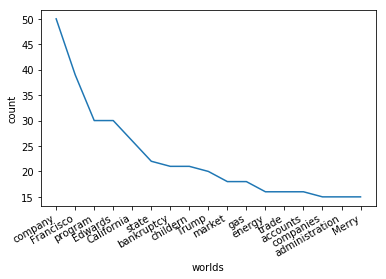

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt  # blow are the most frequent worlds with meaning
wo=["company",'Francisco','program','Edwards',"California",'state','bankruptcy','childern','Trump','market','gas','energy','trade','accounts','companies','administration','Merry']
count=[50,39,30,30,26,22,21,21,20,18,18,16,16,16,15,15,15]
fig, ax = plt.subplots() #plot
ax.plot(wo, count)
plt.xlabel('worlds')
plt.ylabel('count')
fig.autofmt_xdate()

In [65]:
len(locol)                                         ###save all content in txt
txt2=locol.iloc[0,5]
for i in range(1,len(locol),1):
    txt2+=locol.iloc[i,5]
    i+=1
words2 =nltk.word_tokenize(txt2)
fq2 = nltk.FreqDist(w for w in words2)
fq2.most_common(150)                                 #show top 150 most frequent worlds

[(',', 3018),
 ('the', 2083),
 ('.', 1446),
 ('to', 1347),
 ('and', 1237),
 ('a', 1173),
 ('’', 1132),
 ('of', 1091),
 ("''", 1012),
 ('in', 838),
 ('s', 701),
 (':', 655),
 ('for', 590),
 ('“', 586),
 ('”', 580),
 ('is', 437),
 ('that', 424),
 ('on', 395),
 ('was', 366),
 ('said', 365),
 ('with', 344),
 ('San', 293),
 ('he', 291),
 ('I', 280),
 ('it', 265),
 ('Francisco', 263),
 ('at', 256),
 ('The', 251),
 ('her', 237),
 ('from', 231),
 ('she', 221),
 ('his', 218),
 ('$', 200),
 ('t', 191),
 ('have', 188),
 ('be', 188),
 ('—', 184),
 ('are', 181),
 ('who', 181),
 ('as', 173),
 ('an', 161),
 ('has', 155),
 ('by', 152),
 ('people', 143),
 ('city', 142),
 ('not', 140),
 ('more', 133),
 ('but', 133),
 ('@', 133),
 ('their', 132),
 ('...', 130),
 ('they', 126),
 ('had', 123),
 ('Chronicle', 120),
 ('would', 118),
 ('can', 117),
 ('up', 115),
 ('about', 115),
 ('out', 104),
 ('when', 103),
 ('He', 103),
 ('or', 98),
 ('this', 96),
 ('Sharing', 95),
 ('been', 94),
 ('It', 94),
 ('one', 93),

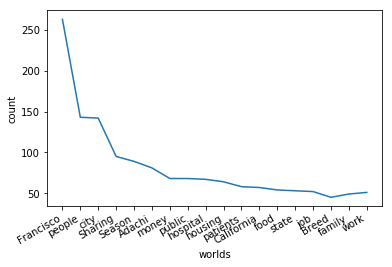

In [67]:
# blow are the most frequent worlds with meaning
wo=['Francisco','people','city','Sharing','Season','Adachi','money','public','hospital','housing','patients','California','food','state','job','Breed','family',"work"]
count=[263,143,142,95,89,81,68,68,67,64,58,57,54,53,52,45,49,51]
fig, ax = plt.subplots() #plot
ax.plot(wo, count)
plt.xlabel('worlds')
plt.ylabel('count')
fig.autofmt_xdate()

In [68]:
len(sport)                                   ###save all content in txt3      
txt3=sport.iloc[0,5]
for i in range(1,len(sport),1):
    txt3+=sport.iloc[i,5]
    i+=1
words3 =nltk.word_tokenize(txt3)
fq3 = nltk.FreqDist(w for w in words3)
fq3.most_common(150)                          #show top 150 most frequent worlds

[(',', 3803),
 ('the', 2593),
 ("''", 2063),
 ('.', 1860),
 ('’', 1691),
 ('a', 1390),
 ('to', 1300),
 ('in', 1193),
 (':', 1172),
 ('and', 1163),
 ('of', 958),
 ('s', 942),
 ('“', 673),
 ('”', 635),
 ('for', 531),
 ('at', 512),
 ('on', 448),
 ('he', 443),
 ('is', 434),
 ('I', 431),
 ('that', 424),
 ('with', 392),
 ('his', 366),
 ('was', 360),
 ('(', 336),
 (')', 336),
 ('it', 333),
 ('said', 326),
 ('The', 280),
 ('as', 264),
 ('t', 250),
 ('be', 246),
 (';', 204),
 ('from', 192),
 ('have', 190),
 ('—', 186),
 ('He', 183),
 ('has', 182),
 ('who', 177),
 ('an', 177),
 ('this', 176),
 ('game', 173),
 ('but', 166),
 ('are', 163),
 ('San', 161),
 ('you', 160),
 ('one', 159),
 ('season', 151),
 ('will', 149),
 ('had', 148),
 ('State', 145),
 ('first', 143),
 ('up', 141),
 ('not', 141),
 ('we', 137),
 ('by', 130),
 ('out', 127),
 ('It', 126),
 ('about', 123),
 ('team', 122),
 ('their', 121),
 ('games', 120),
 ('@', 120),
 ('can', 120),
 ('?', 119),
 ('https', 118),
 ('they', 116),
 ('him', 

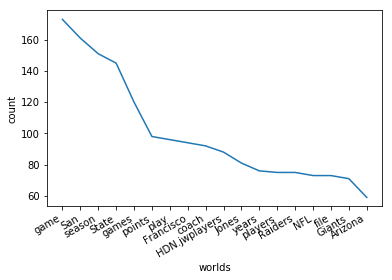

In [69]:
# blow are the most frequent worlds with meaning
wo=['game','San','season','State','games','points','play','Francisco','coach','HDN.jwplayers','Jones','years','players','Raiders','NFL','file','Giants','Arizona']
count=[173,161,151,145,120,98,96,94,92,88,81,76,75,75,73,73,71,59]
fig, ax = plt.subplots()            #plot
ax.plot(wo, count)
plt.xlabel('worlds')
plt.ylabel('count')
fig.autofmt_xdate()

in business it covered
"company",'Francisco','program','Edwards',"California",'state','bankruptcy','childern','Trump','market','gas','energy','trade','accounts','companies','administration','Merry'

in local it coverd
'Francisco','people','city','Sharing','Season','Adachi','money','public','hospital','housing','patients','California','food','state','job','Breed','family',"work"

in sport it coverd
'game','San','season','State','games','points','play','Francisco','coach','HDN.jwplayers','Jones','years','players','Raiders','NFL','file','Giants','Arizona'

Different category do cover different topics, but have some in common like Francisco, California, state,Season, money